# Comparing Plotting Libraries and Declarative Visualizations

In [1]:
from plotnine import *
from matplotlib import pyplot as plt
from plotnine import data
import chart_studio.plotly as py
import seaborn as sns

In [2]:
import chart_studio
# chart_studio.tools.set_credentials_file(username='...', api_key='...')

In [3]:
mpg = data.mpg

## Bar Chart

In [4]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Text(0.5, 1.0, 'Number of Cars by Make')

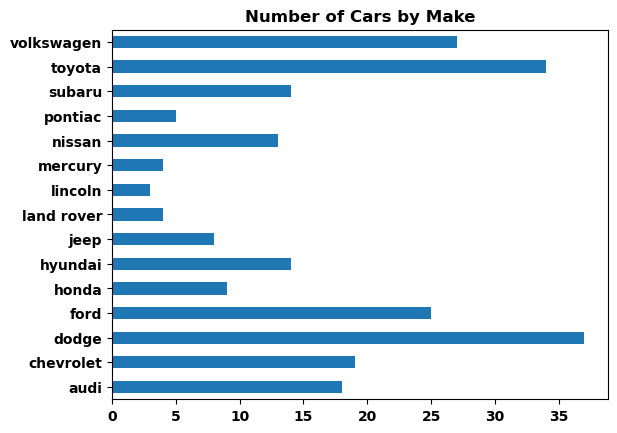

In [5]:
# Pandas
(mpg['manufacturer']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of Cars by Make')
)

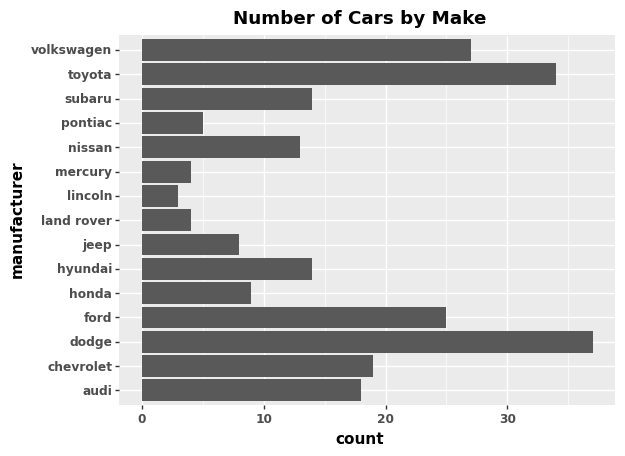

<ggplot: (112474745420)>

In [6]:
# Plotnine (ggplot2 clone)
(ggplot(mpg) + 
   aes(x='manufacturer') +
   geom_bar(size=20) + 
   coord_flip() +
   ggtitle('Number of Cars by Make')
)

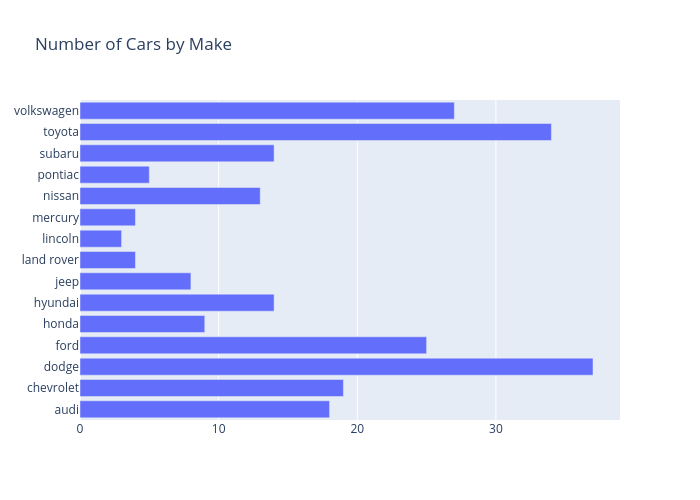

In [7]:
mpgGrouped = mpg.groupby('manufacturer').size()
fig = {
    'data' : [{
        'type' : 'bar',
        'x' : mpgGrouped.values.tolist(),
        'y' : mpgGrouped.index.tolist(),
        'orientation' : 'h'
        
    }],
    'layout' : {
        'title' : 'Number of Cars by Make'
    }
}

py.image.ishow(fig)

## Scatter Plot

<AxesSubplot:xlabel='displ', ylabel='hwy'>

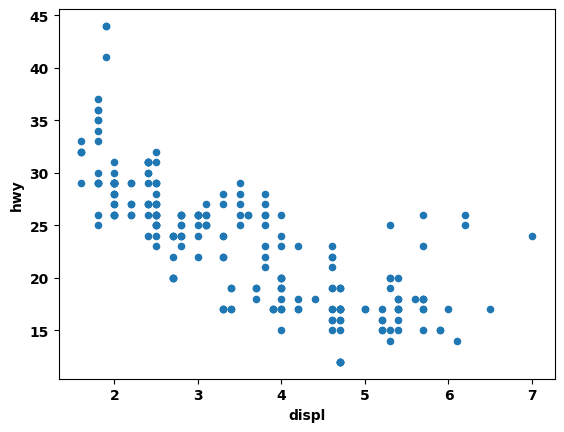

In [8]:
(mpg.
    plot.
    scatter(x='displ', y='hwy'))

In [9]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


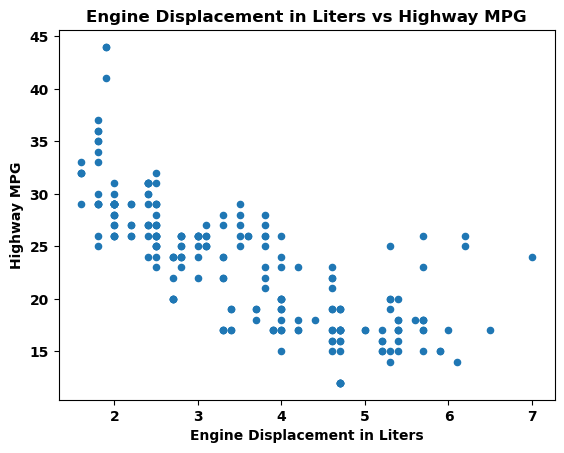

In [10]:
(mpg
 .plot
 .scatter(x='displ', y='hwy')
 .set(title='Engine Displacement in Liters vs Highway MPG',
      xlabel='Engine Displacement in Liters',
      ylabel='Highway MPG'));

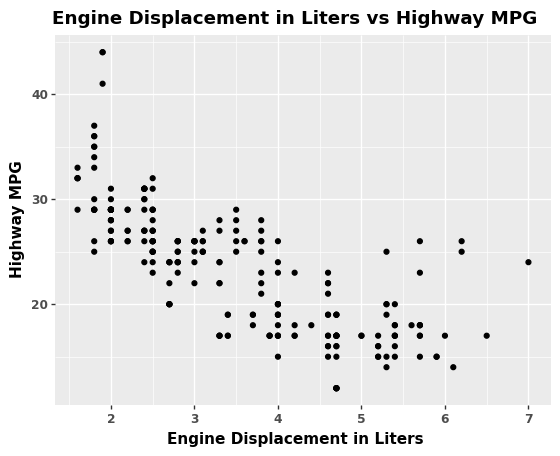

<ggplot: (112474867682)>

In [11]:
(ggplot(mpg) +
    aes(x = 'displ', y = 'hwy') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

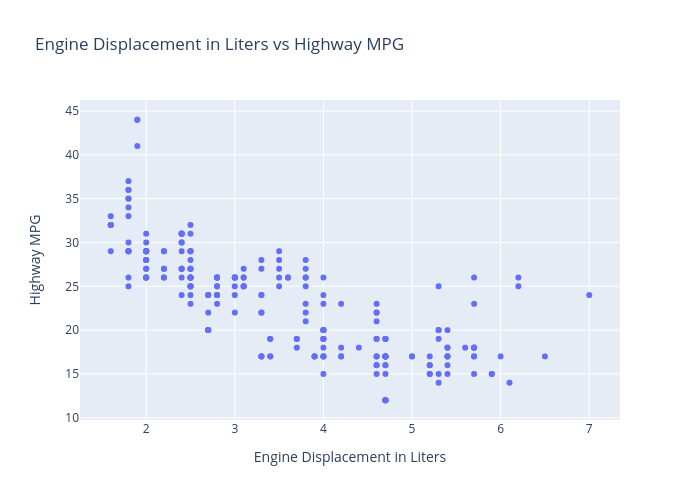

In [12]:
fig = {
    'data' : [{
        'type' : 'scatter',
        'mode' : 'markers',
        'x' : mpg.displ,
        'y' : mpg.hwy        
    }],
    'layout' : {
        'title' : 'Engine Displacement in Liters vs Highway MPG',
        'xaxis' : {
            'title' : 'Engine Displacement in Liters'
        },
        'yaxis' : {
            'title' : 'Highway MPG'
        }
    }
}
py.image.ishow(fig)

## Scatter Plot, Faceted with Color

Text(0, 0.5, 'Highway MPG')

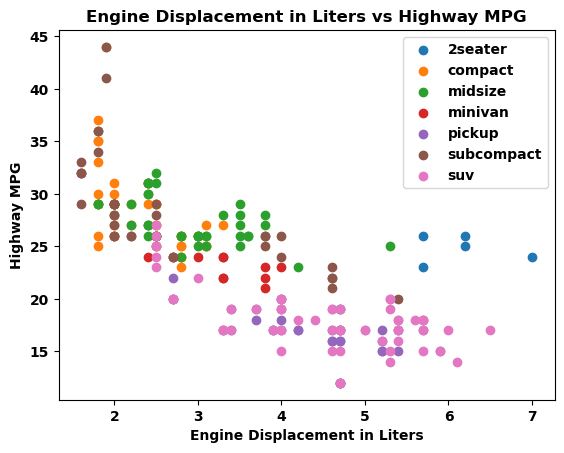

In [13]:
fig, ax = plt.subplots()
for c, df in mpg.groupby('class'):
    ax.scatter(df['displ'], df['hwy'], label=c)
ax.legend()
ax.set_title('Engine Displacement in Liters vs Highway MPG')
ax.set_xlabel('Engine Displacement in Liters')
ax.set_ylabel('Highway MPG')

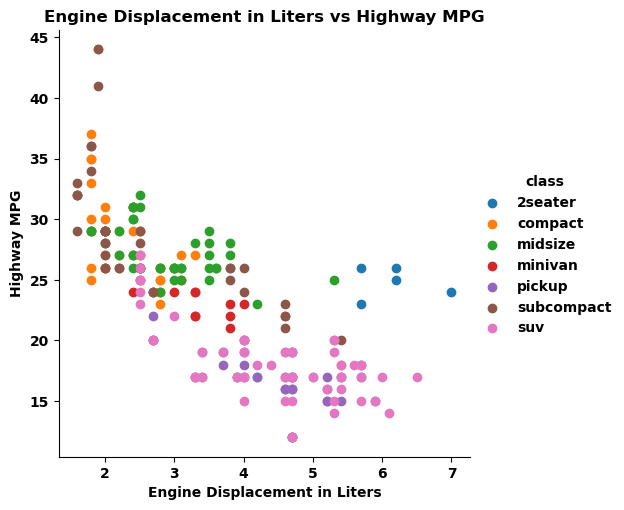

In [14]:
(sns
 .FacetGrid(mpg, hue='class', height=5)
 .map(plt.scatter, 'displ', 'hwy')
 .add_legend()
 .set(
    title='Engine Displacement in Liters vs Highway MPG',
    xlabel='Engine Displacement in Liters',
    ylabel='Highway MPG'
))

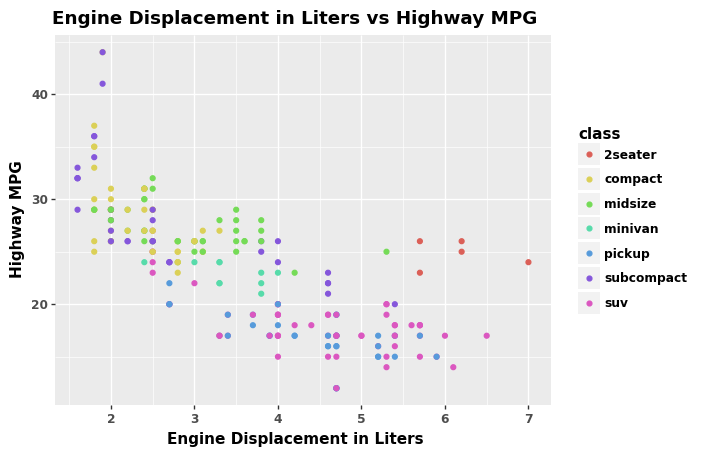

<ggplot: (112474866062)>

In [15]:
(ggplot(mpg) + 
    aes(x = 'displ', y = 'hwy', color = 'class') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

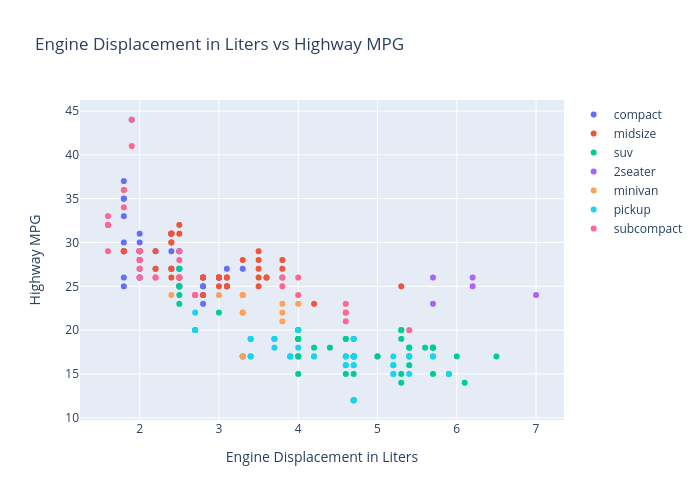

In [16]:
traces = []
for cls in mpg['class'].unique():
    traces.append({
        'type' : 'scatter',
        'mode' : 'markers',
        'x' : mpg.displ[mpg['class'] == cls],
        'y' : mpg.hwy[mpg['class'] == cls],
        'name' : cls
    })
    
fig = {
    'data' : traces,
    'layout' : {
        'title' : 'Engine Displacement in Liters vs Highway MPG',
        'xaxis' : {
            'title' : 'Engine Displacement in Liters',
        },
        'yaxis' : {
            'title' : 'Highway MPG'
        }
    }
}
py.image.ishow(fig)